#  Loan Application Status Prediction

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset


In [1]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

#  There are 614 rows and 13 column present in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# The target variable is Object dtype It means the classifiation promblem

In [5]:
for column in df:
    print(df[column].value_counts())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

In [6]:
df['Loan_ID'].nunique()

614

#  Loan_ID column 614 unique value present in the dataset so it's better we drop this column

In [7]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#  There is null value present in the dataset

#  LoanAmount , Loan_Amount_Term, Credit_History is float dtype so we fill this value mean method and remaining column fill mode method

In [9]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

#  Using loop code sepreate categorical column and numerical column

In [10]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent') 
for i in catgorical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)
    

In [11]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer() 
for i in numerical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)
    

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#  We fill null values imputation techniques

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# 
Based on the provided statistics, here's a summary of the information for each feature:

ApplicantIncome:

Count: 614
Mean: 5403.46
Standard Deviation (Std): 6109.04
Minimum (Min): 150
25th Percentile: 2877.5
Median (50th Percentile): 3812.5
75th Percentile: 5795
Maximum (Max): 81000

CoapplicantIncome:

Count: 614
Mean: 1621.25
Standard Deviation (Std): 2926.25
Minimum (Min): 0
25th Percentile: 0
Median (50th Percentile): 1188.5
75th Percentile: 2297.25
Maximum (Max): 41667

LoanAmount:

Count: 614
Mean: 146.41
Standard Deviation (Std): 84.04
Minimum (Min): 9
25th Percentile: 100.25
Median (50th Percentile): 129
75th Percentile: 164.75
Maximum (Max): 700
Loan_Amount_Term:

Count: 614
Mean: 342
Standard Deviation (Std): 64.37
Minimum (Min): 12
25th Percentile: 360
Median (50th Percentile): 360
75th Percentile: 360
Maximum (Max): 480

Credit_History:

Count: 614
Mean: 0.8422
Standard Deviation (Std): 0.3497
Minimum (Min): 0
25th Percentile: 1
Median (50th Percentile): 1
75th Percentile: 1
Maximum (Max): 1

the all column is right skewness

# EDA

Male      502
Female    112
Name: Gender, dtype: int64


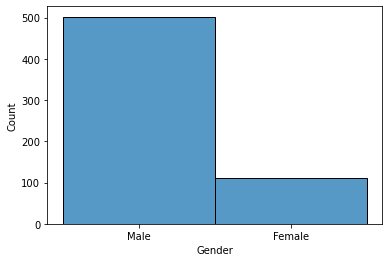

In [14]:
print(df['Gender'].value_counts())
sns.histplot(data=df,x='Gender')
plt.show()


#  
The "Married" column provides insights into the distribution of marital status among the loan applicants. It shows the number of married applicants and the number of unmarried applicants

Yes    401
No     213
Name: Married, dtype: int64


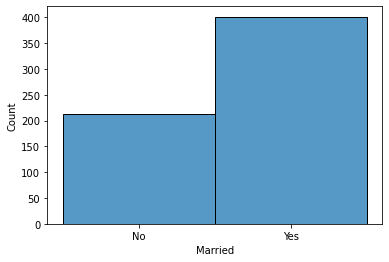

In [15]:
print(df['Married'].value_counts())
sns.histplot(data=df,x='Married')
plt.show()


#   In this dataset we observed Married person is high as compared to sigle person

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


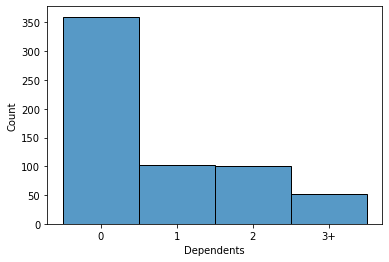

In [16]:
print(df['Dependents'].value_counts())
sns.histplot(data=df,x='Dependents')
plt.show()


# 
there are 360 applicants with no dependents, 102 applicants with one dependent, 101 applicants with two dependents, and 51 applicants with three or more dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


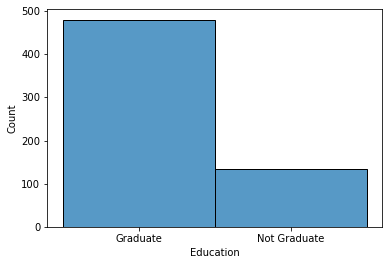

In [17]:
print(df['Education'].value_counts())
sns.histplot(data=df,x='Education')
plt.show()


#  
The "Education" column provides insights into the distribution of educational backgrounds among the loan applicants. It shows the number of applicants who are graduates and those who are not graduates

No     532
Yes     82
Name: Self_Employed, dtype: int64


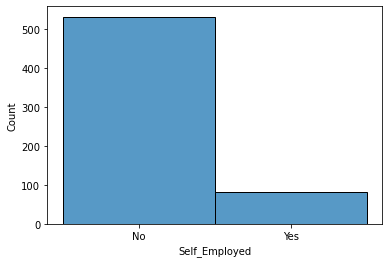

In [18]:
print(df['Self_Employed'].value_counts())
sns.histplot(data=df,x='Self_Employed')
plt.show()


#  
The "Self_Employed" column provides insights into the distribution of self-employment status among the loan applicants. It shows the number of applicants who are self-employed and those who are not

2500.0    9
4583.0    6
6000.0    6
2600.0    6
3333.0    5
         ..
3244.0    1
4408.0    1
3917.0    1
3992.0    1
7583.0    1
Name: ApplicantIncome, Length: 505, dtype: int64


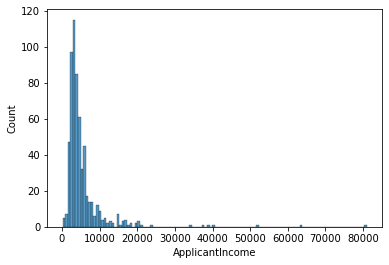

In [19]:
print(df['ApplicantIncome'].value_counts())
sns.histplot(data=df,x='ApplicantIncome')
plt.show()


# 
The "ApplicantIncome" column provides insights into the distribution of income levels among the loan applicants. It shows the number of applicants falling into various income brackets.


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


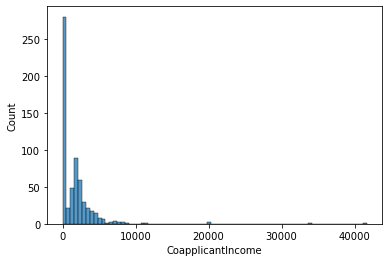

In [20]:
print(df['CoapplicantIncome'].value_counts())
sns.histplot(data=df,x='CoapplicantIncome')
plt.show()


# 
The "CoapplicantIncome" column provides insights into the distribution of co-applicant income levels among the loan applications. It shows the number of applications with co-applicants falling into different income brackets.

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


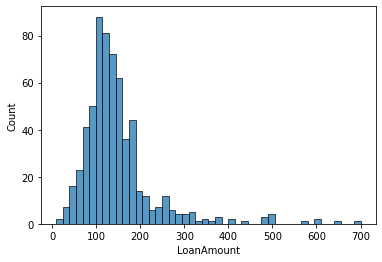

In [21]:
print(df['LoanAmount'].value_counts())
sns.histplot(data=df,x='LoanAmount')
plt.show()


# 
The "LoanAmount" column provides insights into the distribution of requested loan amounts among the loan applicants. It shows the number of applicants requesting different loan amounts.


1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


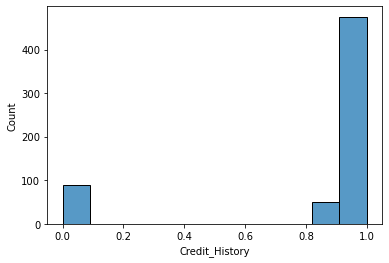

In [22]:
print(df['Credit_History'].value_counts())
sns.histplot(data=df,x='Credit_History')
plt.show()


# 
This information is crucial for loan approval processes, as credit history is a significant factor in determining an applicant's creditworthiness and likelihood of loan repayment

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


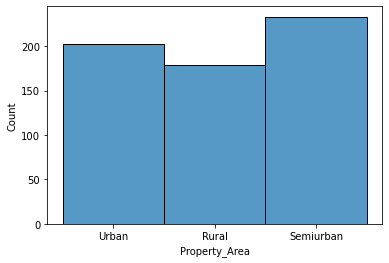

In [23]:
print(df['Property_Area'].value_counts())
sns.histplot(data=df,x='Property_Area')
plt.show()


# 
The "Property_Area" column provides insights into the distribution of property areas among the loan applicants. It shows the number of applicants with properties located in different areas, such as urban, semiurban, or rural

Y    422
N    192
Name: Loan_Status, dtype: int64


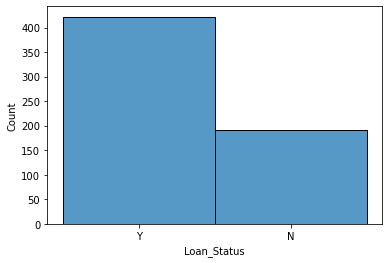

In [24]:
print(df['Loan_Status'].value_counts())
sns.histplot(data=df,x='Loan_Status')
plt.show()


#  
The "Loan_Status" column provides insights into the distribution of loan approval outcomes among the loan applicants. It shows the number of loan applications that were approved (Y) and the number of loan applications that were not approved (N)

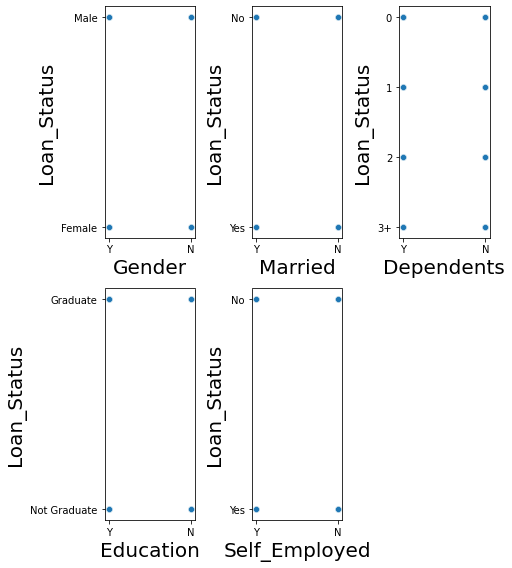

In [25]:
plt.figure(figsize=(7,8))
plotnumber = 1

for column in df:
    if plotnumber <= 5:
        ax= plt.subplot(2, 3, plotnumber)
        sns.scatterplot(y=df[column],data=df,x=df['Loan_Status'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Loan_Status' ,fontsize=20)
     
    plotnumber += 1

plt.tight_layout()
plt.show()


#  Above the visiluation all columnhas a relation with target variables

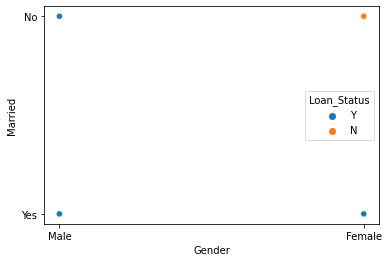

In [26]:
sns.scatterplot(data=df,x='Gender',y='Married',hue='Loan_Status')
plt.show()

#  As per the above visiulation Female single status is no chance of get a loan

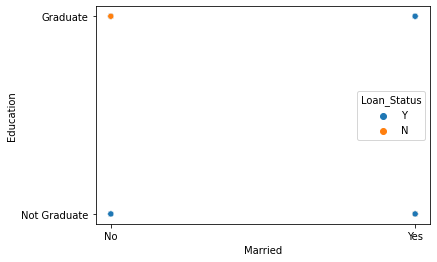

In [27]:
sns.scatterplot(data=df,x='Married',y='Education',hue='Loan_Status')
plt.show()

#  As per the above visiulation Female single status is no chance of get a loan

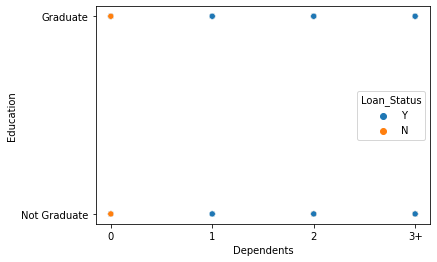

In [28]:
sns.scatterplot(data=df,x='Dependents',y='Education',hue='Loan_Status')
plt.show()

#  As per the above visiulation there is no chance to get a loan if there is 0 dependents

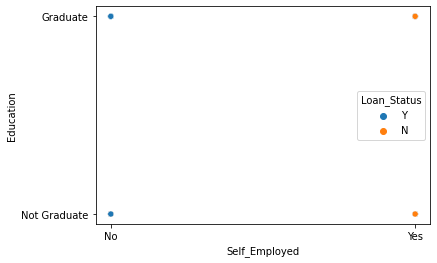

In [29]:
sns.scatterplot(data=df,x='Self_Employed',y='Education',hue='Loan_Status')
plt.show()

# As per the above visiulation if the person is not a  self employed then education is no matter to get a loan

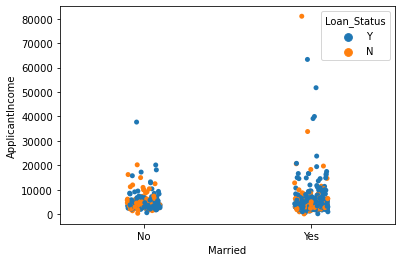

In [30]:
sns.stripplot(data=df,x='Married',y='ApplicantIncome',hue='Loan_Status')
plt.show()

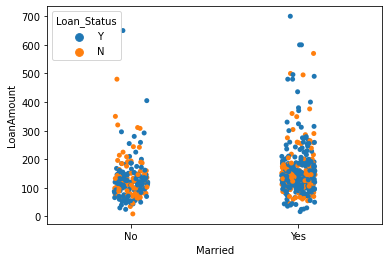

In [31]:
sns.stripplot(data=df,x='Married',y='LoanAmount',hue='Loan_Status')
plt.show()

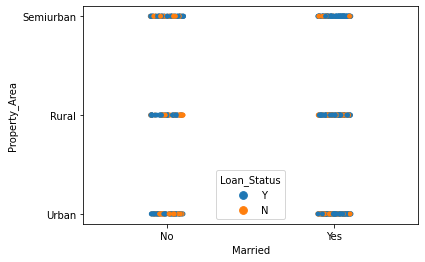

In [32]:
sns.stripplot(data=df,x='Married',y='Property_Area',hue='Loan_Status')
plt.show()

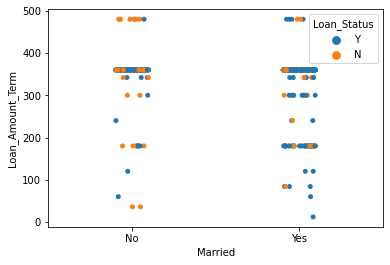

In [33]:
sns.stripplot(data=df,x='Married',y='Loan_Amount_Term',hue='Loan_Status')
plt.show()

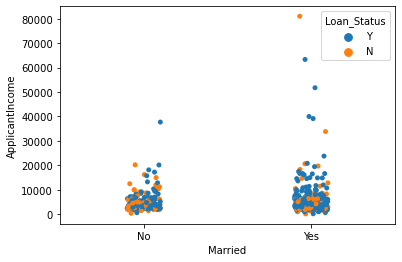

In [34]:
sns.stripplot(data=df,x='Married',y='ApplicantIncome',hue='Loan_Status')
plt.show()

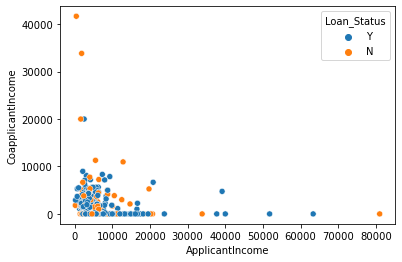

In [35]:
sns.scatterplot(data=df,x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status')
plt.show()

#  As the above visiluation we can see applicate Income is less than coapplicate income there is no chance to get a loan

<AxesSubplot:>

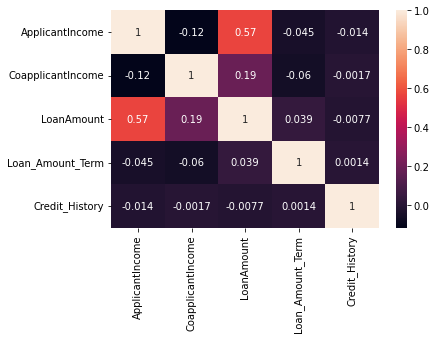

In [36]:
sns.heatmap(df.corr(),annot=True)

#  Above the heatmap There is no co-relation in the dataset

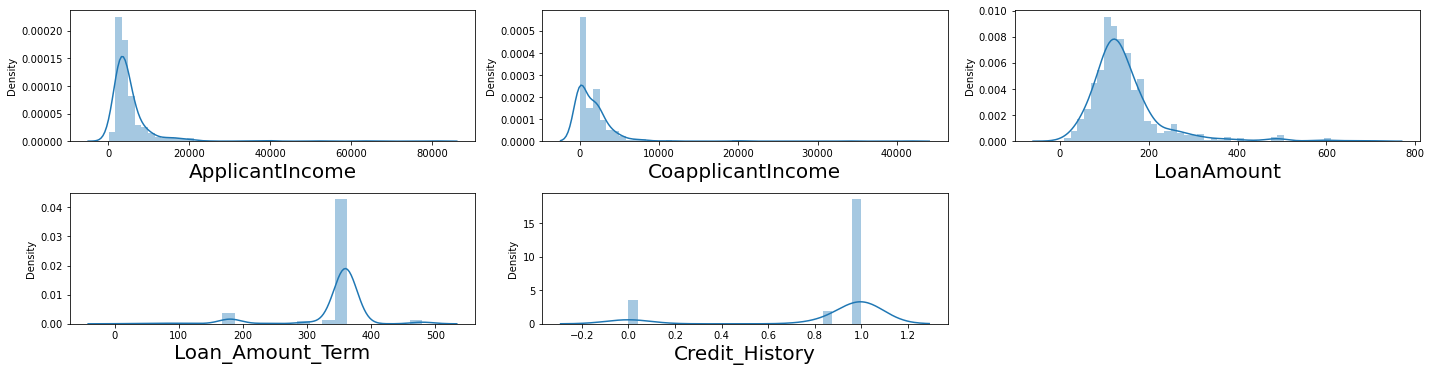

In [37]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
    
plt.tight_layout()

#  Above the distrubution plot the data is right skewness

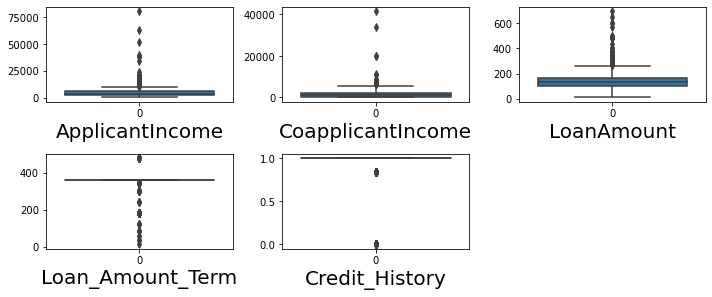

In [38]:
plt.figure(figsize=(10,20))
i=1
for column in numerical_col:
    if i<=30:
        
        
    
       ax= plt.subplot(10,3,i)
    
       sns.boxplot(data=df[column])
    
       plt.xlabel (column,fontsize=20)
        
    i+=1
    
plt.tight_layout()
    
                
                


#  There is outliers present in the dataset we need to remove outliers

In [39]:
x= df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [40]:
from scipy.stats import zscore
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(features))
z.shape
    


(614, 5)

In [129]:
threshold =3
np.where(z>threshold)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [42]:
df1=df[(z<3).all(axis=1)]
print(df1.shape)
print(df.shape)

(577, 12)
(614, 12)


# Data loss 

In [43]:
loss_percent = (614-577)/614*100
loss_percent

6.026058631921824

In [44]:
df=df1

In [45]:
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

#  We found skweness we have to reduce it

In [46]:
columns =df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

for column in columns:
    df[column] =np.cbrt(df[column])

In [47]:
df.skew()

ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

#  
We won't remove skewness  Loan_Amount_Term and Credit_History 
classification column

# Encoding process

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in catgorical_col:
    df[i] = label_encoder.fit_transform(df[i])

In [50]:
x= df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [51]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.546381,-1.185257,-0.668615,-0.487798,-0.331936,0.646839,-1.066303,0.329225,0.218731,0.616493,1.296696
1,0.546381,0.843699,0.370872,-0.487798,-0.331936,0.171727,0.626709,-0.010895,0.218731,0.616493,-1.233132
2,0.546381,0.843699,-0.668615,-0.487798,3.012632,-0.567146,-1.066303,-1.481599,0.218731,0.616493,1.296696
3,0.546381,0.843699,-0.668615,2.050028,-0.331936,-0.804150,0.898750,-0.168888,0.218731,0.616493,1.296696
4,0.546381,-1.185257,-0.668615,-0.487798,-0.331936,0.698753,-1.066303,0.232361,0.218731,0.616493,1.296696
...,...,...,...,...,...,...,...,...,...,...,...
791,-1.830226,-1.185257,0.370872,-0.487798,-0.331936,-0.410939,-1.066303,0.233183,0.218731,0.616493,1.296696
792,0.546381,0.843699,0.370872,2.050028,-0.331936,-0.741371,0.743893,-0.454230,-3.049130,-0.448209,1.296696
793,-1.830226,0.843699,-0.668615,-0.487798,-0.331936,-1.209414,1.071871,-0.634119,0.218731,-1.896853,1.296696
794,-1.830226,-1.185257,-0.668615,-0.487798,-0.331936,-1.030581,-1.066303,-1.446908,-0.803455,-1.896853,-1.233132


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.290375,Gender
1,1.497641,Married
2,1.205769,Dependents
3,1.077636,Education
4,1.062591,Self_Employed
5,1.858258,ApplicantIncome
6,1.726188,CoapplicantIncome
7,1.725293,LoanAmount
8,1.083132,Loan_Amount_Term
9,1.021854,Credit_History


#  all features column vif score is less than 5 so there is no co-relation with each others

#  Preprocessing done now we can build a model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8828451882845189 at random_state 78


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [106]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [107]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.8117154811715481


[[ 78  32]
 [ 13 116]]


In [108]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.891213389121339


[[ 99  11]
 [ 15 114]]


In [109]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.8619246861924686


[[ 97  13]
 [ 20 109]]


In [110]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.803347280334728


[[ 80  30]
 [ 17 112]]


In [111]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.8493723849372385


[[ 85  25]
 [ 11 118]]


In [112]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.7698744769874477


[[ 81  29]
 [ 26 103]]


In [113]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.8661087866108786


[[ 99  11]
 [ 21 108]]


#  Cross Validation Score

In [114]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.7125     0.72327044 0.77358491 0.81132075 0.7672956 ]
0.7575943396226416
Difference between Accuracy score  and cross validation score is -  0.05412114154890657


In [115]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.76875    0.77987421 0.86163522 0.83647799 0.9245283 ]
0.8342531446540882
Difference between Accuracy score  and cross validation score is -  0.05696024446725079


In [116]:
print('RandomForestClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

RandomForestClassifier 


[0.75625    0.75471698 0.83647799 0.8490566  0.93081761]
0.8254638364779874
Difference between Accuracy score  and cross validation score is -  0.06574955264335158


In [117]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.69375    0.73584906 0.78616352 0.82389937 0.79874214]
0.7676808176100629
Difference between Accuracy score  and cross validation score is -  0.035666462724665116


In [118]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.70625    0.74213836 0.81761006 0.81761006 0.86163522]
0.789048742138365
Difference between Accuracy score  and cross validation score is -  0.06032364279887359


In [119]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.69375    0.71698113 0.79874214 0.79245283 0.80503145]
0.7613915094339623
Difference between Accuracy score  and cross validation score is -  0.008482967553485432


In [120]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.78125    0.72955975 0.86792453 0.81132075 0.82389937]
0.8027908805031447
Difference between Accuracy score  and cross validation score is -  0.06331790610773391


#  RandomForestClassifier is giving 87 percent accuracy and 
# cross validation difference score mean is 4 per 

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gdsv = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [122]:
gdsv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [125]:
Final_model= RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

88.28451882845188


In [131]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [132]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 

              precision    recall  f1-score   support

           0       0.45      0.44      0.44       110
           1       0.53      0.54      0.54       129

    accuracy                           0.49       239
   macro avg       0.49      0.49      0.49       239
weighted avg       0.49      0.49      0.49       239



In [134]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [135]:
print('threshold',threshold)
print('False possitive rate',fpr)
print('True possitive rate',tpr)

threshold [2 1 0]
False possitive rate [0.         0.56363636 1.        ]
True possitive rate [0.         0.54263566 1.        ]


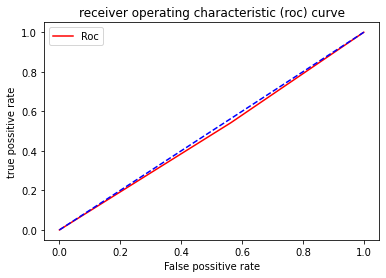

In [136]:
plt.plot(fpr,tpr, color='red', label='Roc')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False possitive rate')
plt.ylabel('true possitive rate')
plt.title('receiver operating characteristic (roc) curve')
plt.legend()
plt.show()

In [137]:
# how  much area auc curve covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.4894996476391825